# Cross-Entropy and adaptive noise scaling

---
In this notebook, we will train an agent with OpenAI Gym's CartPoleContinuous environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np

### 2. Instantiate the Environment

In [2]:
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
action space: Discrete(2)


### 3. Instanciate model and train it using hill climbing

In [3]:
from ce_w_ans_agent import HillClimbing
from model import FCNetwork

In [5]:
model = FCNetwork()
hc=HillClimbing()
scores = hc.train(env, model, gamma=1.0, n_episodes=1000, print_every=20)

Episode 20	Average Score: 25.95
Episode 40	Average Score: 25.85
Episode 60	Average Score: 44.27
Episode 80	Average Score: 53.98
Episode 100	Average Score: 74.92
Episode 120	Average Score: 108.02
Episode 140	Average Score: 142.00
Episode 160	Average Score: 163.07
Episode 180	Average Score: 182.84
Episode 200	Average Score: 187.28
Episode 220	Average Score: 187.40
Episode 240	Average Score: 186.29
Episode 260	Average Score: 188.19
Episode 280	Average Score: 190.26
Episode 300	Average Score: 190.52
Episode 320	Average Score: 191.72
Episode 340	Average Score: 189.60
Episode 360	Average Score: 189.13
Episode 380	Average Score: 189.49
Episode 400	Average Score: 190.56
Episode 420	Average Score: 189.68
Episode 440	Average Score: 192.81
Episode 460	Average Score: 192.35
Episode 480	Average Score: 190.91
Episode 500	Average Score: 192.10
Episode 520	Average Score: 192.03
Episode 540	Average Score: 193.00
Episode 560	Average Score: 192.29
Episode 580	Average Score: 193.70
Episode 600	Average Sco

### 5. Plot the Scores

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

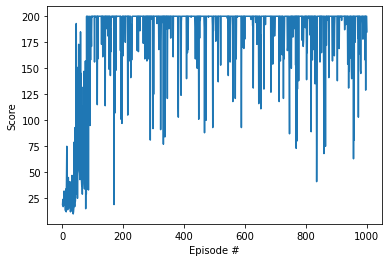

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 6. Watch a Smart Agent!

In [8]:
!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

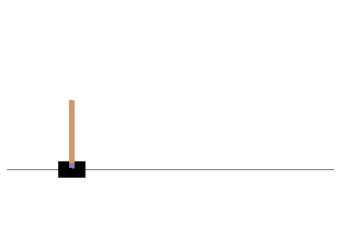

In [10]:
Load=True

if Load:
    model.load("chpt_195.npy")

env = gym.make('CartPole-v0')
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for t in range(200):
    action = np.random.choice(2, p=model.forward(state)) 
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()